In [ ]:
## Dumb Political Cycle Model



In [2]:
%%time
dataset_name = "W19_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

del BES_Panel

Toggle code

Wall time: 816 ms


In [275]:
gc.collect()
memory_use(locs = locals().items())

                       dummies:  31.2MiB
                  BES_Panel_19:  28.4MiB
                          _135:  28.4MiB
                          _143:  26.5MiB
                            df:  16.9MiB
                          _233:  16.9MiB
                          _175:  16.8MiB
                          _204:  16.8MiB
              pan_dataset_ages:  16.7MiB
                  BES_Panel_97:  10.2MiB


In [16]:
y=np.sin( 2*np.pi*(x-1979)/(40) )
y

array([ 0.00000000e+00,  1.56434465e-01,  3.09016994e-01,  4.53990500e-01,
        5.87785252e-01,  7.07106781e-01,  8.09016994e-01,  8.91006524e-01,
        9.51056516e-01,  9.87688341e-01,  1.00000000e+00,  9.87688341e-01,
        9.51056516e-01,  8.91006524e-01,  8.09016994e-01,  7.07106781e-01,
        5.87785252e-01,  4.53990500e-01,  3.09016994e-01,  1.56434465e-01,
        1.22464680e-16, -1.56434465e-01, -3.09016994e-01, -4.53990500e-01,
       -5.87785252e-01, -7.07106781e-01, -8.09016994e-01, -8.91006524e-01,
       -9.51056516e-01, -9.87688341e-01, -1.00000000e+00, -9.87688341e-01,
       -9.51056516e-01, -8.91006524e-01, -8.09016994e-01, -7.07106781e-01,
       -5.87785252e-01, -4.53990500e-01, -3.09016994e-01, -1.56434465e-01,
       -2.44929360e-16,  1.56434465e-01,  3.09016994e-01,  4.53990500e-01])

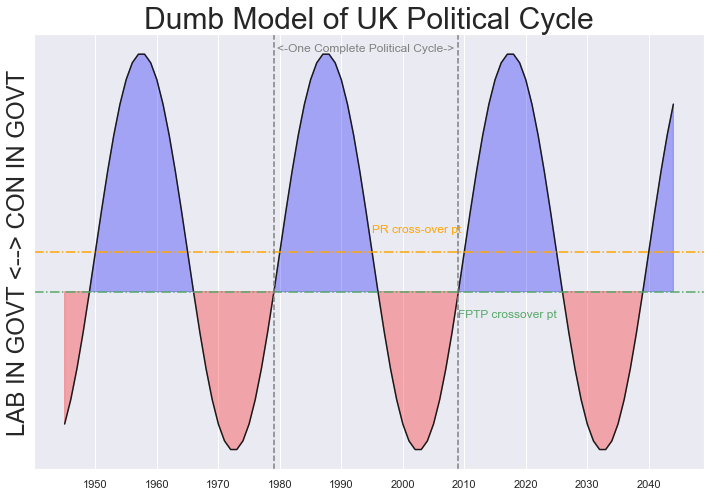

In [133]:
# plt.plot(x,y)
midpoint = -.2
start_year =1945
finish_year = 2045
zero_year = 1980
cycle_length = 30
x=np.array(range(start_year,finish_year))
y=np.sin( 2*np.pi*(x-zero_year)/cycle_length )
plt.figure(figsize=(12,8));
plt.plot(x,y,'k');
plt.fill_between(x, y, midpoint,
                 where=(y < [midpoint]*len(y)),
                 alpha=0.30, color='red', interpolate=True);
plt.fill_between(x, y, midpoint,
                 where=(y >= [midpoint]*len(y)),
                 alpha=0.30, color='blue', interpolate=True);
plt.axhline(y = midpoint, color = 'g', linestyle = '-.',label="FPTP cross-over pt");
plt.text(2009,midpoint-.13,'FPTP crossover pt',rotation=0,c='g')
plt.axhline(y = 0, color = 'orange', linestyle = '-.',label="PR cross-over pt");
plt.text(1995,0+.1,'PR cross-over pt',rotation=0,c='orange')

plt.axvline(x = 1979, color = 'grey', linestyle = '--');
plt.axvline(x = 2009, color = 'grey', linestyle = '--');
plt.text(1979.5,1.01,'<-One Complete Political Cycle->',rotation=0,c='grey')

plt.ylabel("LAB IN GOVT <--> CON IN GOVT",fontsize=24);
plt.title("Dumb Model of UK Political Cycle",fontsize=30);
# plt.legend()
plt.yticks([]);
import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
plt.gca().xaxis.set_major_locator(loc)
plt.show()

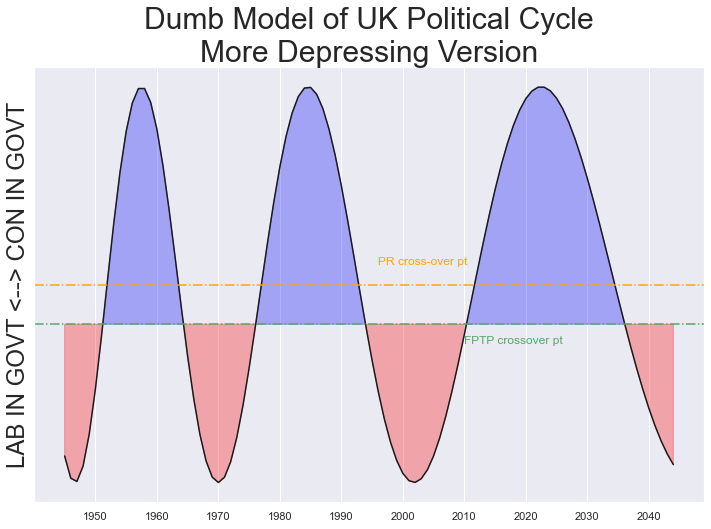

In [121]:
# plt.plot(x,y)
midpoint = -.2
start_year =1945
finish_year = 2045
zero_year = 1977
cycle_length_start = 24
cycle_length_finish = 40

x=np.array(range(start_year,finish_year))
cycle_length = cycle_length_start+(cycle_length_finish-cycle_length_start)*(x-start_year)/(finish_year-start_year)
y=np.sin( 2*np.pi*(x-zero_year)/cycle_length )
plt.figure(figsize=(12,8));
plt.plot(x,y,'k');
plt.fill_between(x, y, midpoint,
                 where=(y < [midpoint]*len(y)),
                 alpha=0.30, color='red', interpolate=True);
plt.fill_between(x, y, midpoint,
                 where=(y >= [midpoint]*len(y)),
                 alpha=0.30, color='blue', interpolate=True);
plt.axhline(y = midpoint, color = 'g', linestyle = '-.',label="FPTP cross-over pt");
plt.text(2010,midpoint-.1,'FPTP crossover pt',rotation=0,c='g')
plt.axhline(y = 0, color = 'orange', linestyle = '-.',label="PR cross-over pt");
plt.text(1996,0+.1,'PR cross-over pt',rotation=0,c='orange')

plt.ylabel("LAB IN GOVT <--> CON IN GOVT",fontsize=24);
plt.title("Dumb Model of UK Political Cycle\nMore Depressing Version",fontsize=30);
plt.yticks([]);
import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
plt.gca().xaxis.set_major_locator(loc)
plt.show()

In [134]:
BES_Panel_19 = pd.read_stata("E:\\BES_analysis_data\\Face_to_face\\19\\bes_rps_2019_1.1.1.dta")
data = pd.read_stata("E:\\BES_analysis_data\\Face_to_face\\19\\bes_rps_2019_1.1.1.dta", iterator = True)
labels_19 = data.variable_labels()

In [140]:
df = BES_Panel_19
# df.columns[df.dtypes=="category"]
dummies = pd.get_dummies(df.select_dtypes('category'), dummy_na=True)
df[dummies.columns] = dummies
df.drop(df.columns[df.dtypes=="category"],axis=1,inplace=True)

In [144]:
df.dtypes.value_counts()
df_var = df.var()
df = df[df_var[df_var>.005].index]

In [ ]:
# prep2 = pd.get_dummies(prep2.select_dtypes('category'), dummy_na=True)
# prep2_var = prep2.var()
# prep2 = prep2[prep2_var[prep2_var>.005].index]

In [ ]:
## get DNV variable

In [145]:
df = df.select_dtypes('number')

In [ ]:
vote_replace_dict = {"Conservative":"CON","Conservative Party":"CON",
                     "Labour":"LAB","Labour Party":"LAB",
                     "Did not vote":"DNV","No, did not vote":"DNV","Spoilt ballot paper":"DNV",
                     "Yes, voted":"VOTED",
                     "Liberal Democrat":"LD","Liberal Democrats":"LD",
                     "Don't know":"DK","Not stated":"DK","Prefer not to say/Refuse":"DK",
"Scottish National Party":"SNP","United Kingdom Independence Party (UKIP)":"UKIP",
"Green Party":"GP","Not eligible/too young to vote":"TYTV","Plaid Cymru":"PC",
"Brexit":"BXP","Brexit Party":"BXP",
"Other":"OTH","Independent":"OTH","Specified name- no party mentioned":"OTH","An independent candidate":"OTH",
                     "British National Party (BNP)":"BNP"}

vote_2019 = BES_Panel_19["b02"].replace(vote_replace_dict)
vote_2019.loc[BES_Panel_19["b01"].replace(vote_replace_dict)=="DNV"]="DNV"
vote_2019.loc[BES_Panel_19["b01"].replace(vote_replace_dict)=="DK"]="DK"
vote_2019.name = "2019GE"

In [146]:
search(df,"b01")

b01_Prefer not to say/Refuse    3946
b01_Yes, voted                  3946
b01_No, did not vote            3946
dtype: int64

In [148]:
df

,finalserialno,Y10A,Q24_CSES,Stratum,total_num_dwel,total_num_hous,num_elig_people,wt_sel_wt,ns_sec,pano,...,dwelling_type_Detached house,dwelling_type_Bungalow,dwelling_type_nan,edlevel_No qualifications,edlevel_Below GCSE,edlevel_GCSE,edlevel_A-level,edlevel_Undergraduate,edlevel_Postgrad,edlevel_nan
0,10102,NaN,34.0,2,1.0,1.0,1,0.525923,4.1,75,...,0,0,0,0,0,0,0,1,0,0
1,10103,2.0,NaN,2,NaN,NaN,2,1.051846,NaN,75,...,0,0,1,0,0,0,0,0,0,1
2,10105,2.0,NaN,2,NaN,NaN,2,1.051846,4.1,75,...,0,0,1,0,0,0,0,0,1,0
3,10110,NaN,NaN,2,1.0,1.0,1,0.525923,14.1,75,...,0,0,0,1,0,0,0,0,0,0
4,10111,NaN,NaN,2,1.0,1.0,2,1.051846,12.1,75,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,90006,NaN,59.0,42,1.0,1.0,1,0.525923,2.0,591,...,0,0,0,0,0,0,0,0,1,0
3942,90007,1.0,NaN,42,NaN,NaN,1,0.525923,4.1,591,...,0,0,1,0,0,1,0,0,0,0
3943,90008,2.0,NaN,42,NaN,NaN,2,1.051846,2.0,591,...,0,0,1,0,0,0,0,0,1,0
3944,90009,NaN,63.0,42,1.0,1.0,2,1.051846,4.1,591,...,1,0,0,0,1,0,0,0,0,0


In [149]:
df["DNV"]=df["b01_No, did not vote"]

[0]	validation_0-rmse:0.490726
Will train until validation_0-rmse hasn't improved in 8.3 rounds.
[1]	validation_0-rmse:0.482207
[2]	validation_0-rmse:0.473211
[3]	validation_0-rmse:0.465249
[4]	validation_0-rmse:0.457414
[5]	validation_0-rmse:0.450774
[6]	validation_0-rmse:0.444983
[7]	validation_0-rmse:0.438225
[8]	validation_0-rmse:0.432502
[9]	validation_0-rmse:0.427458
[10]	validation_0-rmse:0.422907
[11]	validation_0-rmse:0.418166
[12]	validation_0-rmse:0.413687
[13]	validation_0-rmse:0.409171
[14]	validation_0-rmse:0.405575
[15]	validation_0-rmse:0.401469
[16]	validation_0-rmse:0.398007
[17]	validation_0-rmse:0.394957
[18]	validation_0-rmse:0.391821
[19]	validation_0-rmse:0.389132
[20]	validation_0-rmse:0.38645
[21]	validation_0-rmse:0.383902
[22]	validation_0-rmse:0.38142
[23]	validation_0-rmse:0.378876
[24]	validation_0-rmse:0.376689
[25]	validation_0-rmse:0.374698
[26]	validation_0-rmse:0.372927
[27]	validation_0-rmse:0.370903
[28]	validation_0-rmse:0.368993
[29]	validation_0-

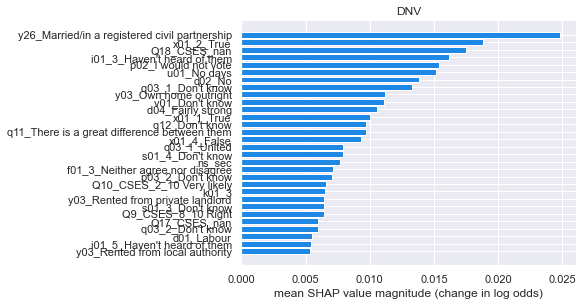

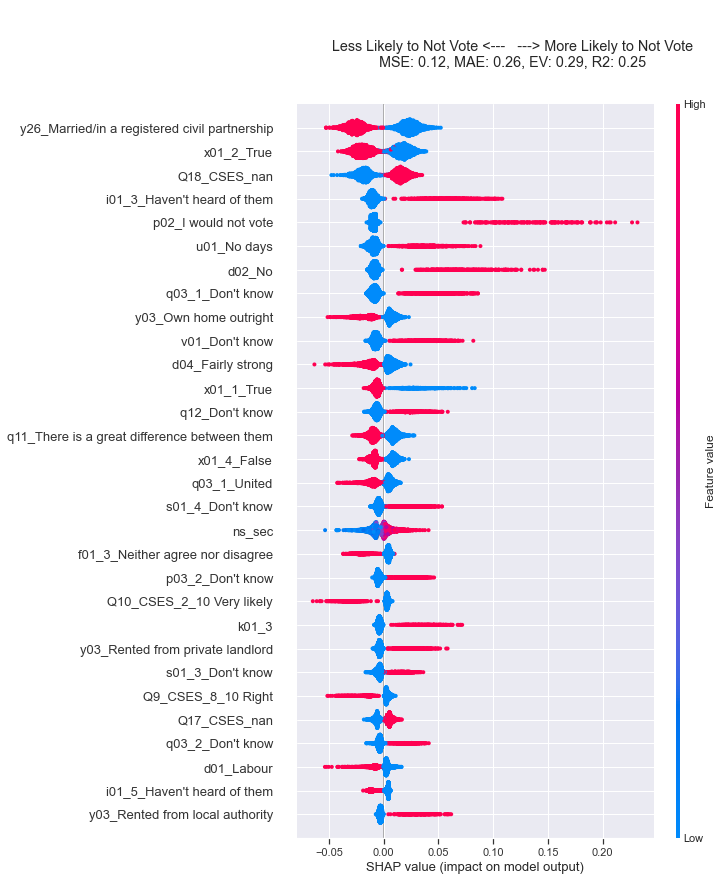

Wall time: 18.2 s


(<shap.explainers.tree.TreeExplainer at 0x12d81bc8>,
 array([[ 0.00215525, -0.0008132 ,  0.0018369 , ..., -0.00238808,
          0.        ,  0.        ],
        [-0.00153855,  0.00071114,  0.00109555, ...,  0.00022895,
          0.        ,  0.        ],
        [-0.01216084, -0.00051289,  0.00165964, ...,  0.00041418,
          0.        ,  0.        ],
        ...,
        [ 0.00530842,  0.00137923,  0.00063586, ...,  0.00015388,
          0.        ,  0.        ],
        [ 0.00460215, -0.00017329, -0.00106034, ...,  0.00015329,
          0.        ,  0.        ],
        [ 0.00659763,  0.00099991,  0.00104518, ..., -0.00075131,
          0.        ,  0.        ]], dtype=float32),
 Index(['finalserialno', 'Y10A', 'Q24_CSES', 'Stratum', 'total_num_dwel',
        'total_num_hous', 'ns_sec', 'pano', 'agency_Ipsos', 'agency_NatCen',
        ...
        'dwelling_type_Detached house', 'dwelling_type_Bungalow',
        'dwelling_type_nan', 'edlevel_No qualifications', 'edlevel_Below GCS

In [167]:
%%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "DNV_2019"
var_stub = "DNV"

var_list = ["DNV"]
var_stub_list = [var_stub,"b01","b02_nan","b05_nan","b0601_nan","b0602_nan","b0603_nan","b0604_nan","b0605_nan"
                ,"b0606_nan","b0607_nan","b0608_nan","b0609_nan","b0610_nan","b0611_nan","b0612_nan","b0613_nan",
                "b0614_nan","b0615_nan","b0616_nan","b0617_nan","b0618_nan","b0619_nan", 
                "b0608_No", "b0615_No","b0616_No","b0617_No","b0618_No","b0619_No","b0613_No","b0606_No","b0607_No","b0605_No",
                "b05_In person","b06014_No","b06011_No","b0601_No","b06012_No","b0603_No","b0602_No","b0609_No","b06010_No","b0609_No",
                "b0611_No","b0614_No","b0612_No","b0604_No","b0610_No","b04_nan","b0611_Yes","b0601_Yes","b0602_Yes","b0603_Yes",
                "b02_","b04_","wt_","b05_","b06a_","b06_","d02_nan","d04_nan",
                "y45_","num_elig_people", # eligibility
                "p01_","u05", # recalled votes
                "b07_","c01_","a03", # interested in elections
                "c02_",
                ]
# BES_reduced_with_na = BES_reduced_with_na.astype('float')
mask = df["DNV"].notnull() & BES_Panel_19["wt_vote"].notnull()
colname = "DNV 2019"
xgboost_run(subdir=colname,dataset=df[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=BES_Panel_19["wt_vote"][mask],
            min_features = min(df.shape[1]-1,30),
            title = "\n\nLess Likely to Not Vote <---   ---> More Likely to Not Vote")

In [ ]:

# elig vars:
# "num_elig_people", "y45" (registered)
# voting vars:
# p01_,u05,
# care vars:
# b07_,c01_,a03

In [ ]:
## Q10_CSES_2_10 Very likely => strong effect on voting

In [171]:
fn = "E:\\BES_analysis_data\\Face_to_face\\97\\97BES.dta"
BES_Panel_97 = pd.read_stata(fn)
data = pd.read_stata(fn, iterator = True)
labels_97 = data.variable_labels()

In [172]:
# vote_replace_dict.update({'skp,didnt vote':"DNV",'refused to disclose voting':"DK",
#                          'other party':"OTH",'referendum party':"REF",'not     answered':"DK"})

# vote_1997 = BES_Panel_97["vote"]

# vote_1997 = vote_1997.replace(vote_replace_dict)
# vote_1997.loc[BES_Panel_97["voted"].replace({"voted":"VOTED","didn't vote":"DNV","not app":"DK"})=="DNV"]="DNV"
# vote_1997.loc[BES_Panel_97["voted"].replace({"voted":"VOTED","didn't vote":"DNV","not app":"DK"})=="DK"]="DK"
# vote_1997.name = "1997GE"
# vote_1997.value_counts()

In [229]:
df = BES_Panel_97.copy()
# df.columns[df.dtypes=="category"]
dummies = pd.get_dummies(df.select_dtypes('category'), dummy_na=True)
df[dummies.columns] = dummies
df.drop(df.columns[df.dtypes=="category"],axis=1,inplace=True)

df.dtypes.value_counts()
df_var = df.var()
df = df[df_var[df_var>.005].index]

df = df.select_dtypes('number')

vote_replace_dict = ({'skp,didnt vote':"DNV",'refused to disclose voting':"DK",
                         'other party':"OTH",'referendum party':"REF",'not     answered':"DK"})



In [230]:
df.columns = [x.replace("<","LT") for x in df.columns]

In [231]:
df["DNV"]=BES_Panel_97["vote"]=="skp,didnt vote"

In [245]:
BES_Panel_97["vote92"].cat.categories

Index(['did not vote', 'conservative', 'labour', 'liberal democrat',
       'scottish national party', 'plaid cymru', 'green party',
       'other (write in)', 'not eligible / too young to vote',
       'refused to disclose voting', 'can t remember / don t know'],
      dtype='object')

In [247]:
df["DNVdef_voted_92"] = BES_Panel_97["vote92"].apply(lambda x: False if x in ['did not vote',
                        'not eligible / too young to vote','refused to disclose voting', 'can t remember / don t know'] else True)

In [256]:
df["DNVdef_voted_92"].apply(lambda x: not x)

0        True
1        True
2        True
3       False
4       False
        ...  
3610     True
3611    False
3612    False
3613    False
3614    False
Name: DNVdef_voted_92, Length: 3615, dtype: bool

In [258]:
## shortcut to cre

df["DNV_92votersonly"] = df["DNV"].copy()
df.loc[df["DNVdef_voted_92"].apply(lambda x: not x),"DNV_92votersonly"]=np.nan


[0]	validation_0-rmse:0.485263
Will train until validation_0-rmse hasn't improved in 5.0 rounds.
[1]	validation_0-rmse:0.471427
[2]	validation_0-rmse:0.459074
[3]	validation_0-rmse:0.447224
[4]	validation_0-rmse:0.436121
[5]	validation_0-rmse:0.425944
[6]	validation_0-rmse:0.416591
[7]	validation_0-rmse:0.408113
[8]	validation_0-rmse:0.4001
[9]	validation_0-rmse:0.392452
[10]	validation_0-rmse:0.385535
[11]	validation_0-rmse:0.379538
[12]	validation_0-rmse:0.373703
[13]	validation_0-rmse:0.368669
[14]	validation_0-rmse:0.36385
[15]	validation_0-rmse:0.359819
[16]	validation_0-rmse:0.356123
[17]	validation_0-rmse:0.352871
[18]	validation_0-rmse:0.349877
[19]	validation_0-rmse:0.34688
[20]	validation_0-rmse:0.34422
[21]	validation_0-rmse:0.341811
[22]	validation_0-rmse:0.339662
[23]	validation_0-rmse:0.337757
[24]	validation_0-rmse:0.336092
[25]	validation_0-rmse:0.334395
[26]	validation_0-rmse:0.332998
[27]	validation_0-rmse:0.33162
[28]	validation_0-rmse:0.33055
[29]	validation_0-rmse:

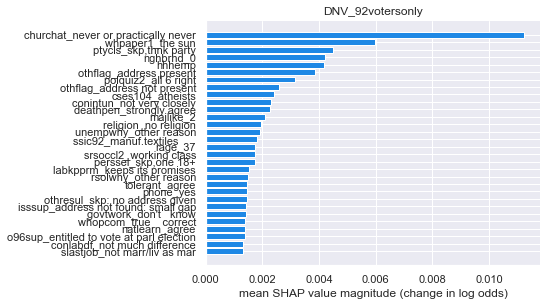

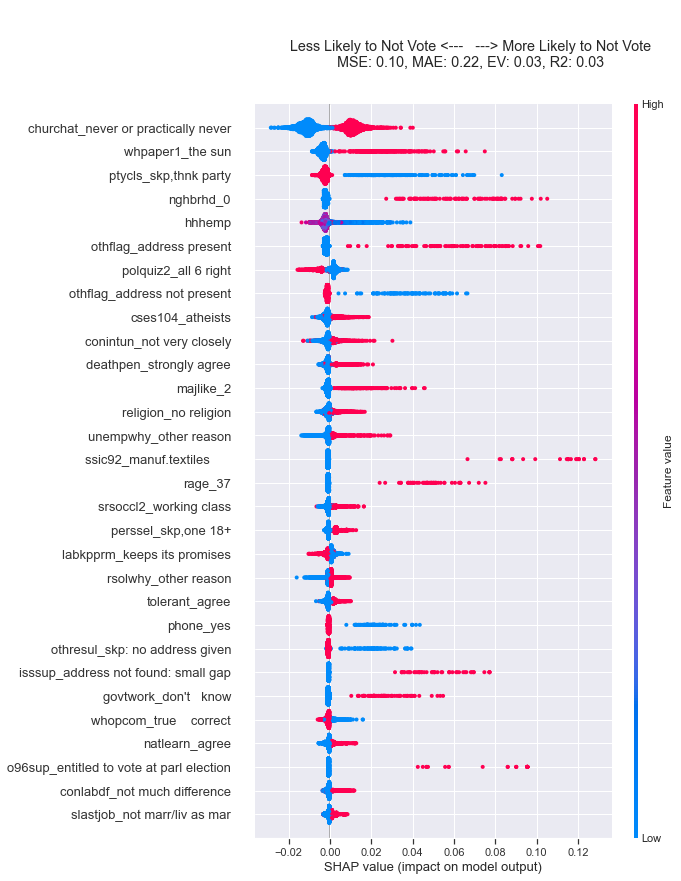

(<shap.explainers.tree.TreeExplainer at 0x11f35588>,
 array([[ 6.1738618e-05, -2.0840442e-04,  1.7632865e-06, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 9.3958042e-06, -2.8438674e-04, -2.6191899e-04, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 9.3958042e-06, -3.8034891e-04, -6.0812355e-04, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [-3.2411066e-03,  9.3824463e-04, -2.2739933e-03, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.2509286e-05, -1.3023044e-03, -2.4153992e-04, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-1.4050784e-04,  2.9027823e-04, -4.9670588e-04, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
 Index(['shour', 'smin', 'popden', 'hhhemp', 'ethnall', 'ethnads', 'moi',
        'duno', 'fhour', 'fmin',
        ...
        'libauth_3.0', 'libauth_3.1666666666666665',
        'libauth_3.333333

In [269]:
# %%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "DNV_1997"
var_stub = "DNV"

var_list = ["DNV_92votersonly"]
var_stub_list = [var_stub,
                 # structural correlations
                 "voted_","votecod","yvotecls",
                 "whendecd_skp","vote_skp","sercnsdr_skp","vote2nd_skp","ptypref_skp",
                 "sercnsdr_","whendecd_","erresult_","issresul_","turnout_","vote_","votdlc",
                 "vote2nd","votelc_","issturn_",
                 "wt","intnum","spoint",
                 "ldfeel","confeel","labfeel","grnfeel","reffeel","snpfeel","pcfeel",
                 "serialno","stratno","persno", # I think just BES uid - but why does this correlate????
                 # pol knowledge/attention
                 "cand1pty_","cand2pty_","cand3pty_","cand4pty_","cand5pty_","cand6pty_",
                 "cand1sex_","cand2sex_","cand3sex_","cand4sex_","cand5sex_","cand6sex_",
                 "rknlce", "artatpl_","canecind_","ldtxspd_","deposit_","gelec4yr_","polquiz2",
                 # care about politics/voting/partyid
                 "carewon_", "idstrng_","politics_","ptyclsmu_","ptythnk_","ptyclsc_","ptyltcls_","ptycls_",
                 "tvnatfrq_", "wktvatpl_","artatec","wktvatec_", # how many days do you watch news/how much attn political news (a little/none)
                 # attitude to voting
                 "voteresp_","votediff_","powerdif_", "pringb_",#(mid-point)
                 # registration
                 "elregon_","elregnot_","issregis_",
                 
                 
                 
#                 "b01","b02_nan","b05_nan","b0601_nan","b0602_nan","b0603_nan","b0604_nan","b0605_nan",
#                 "b0606_nan","b0607_nan","b0608_nan","b0609_nan","b0610_nan","b0611_nan","b0612_nan","b0613_nan",
#                 "b0614_nan","b0615_nan","b0616_nan","b0617_nan","b0618_nan","b0619_nan", 
#                 "b0608_No", "b0615_No","b0616_No","b0617_No","b0618_No","b0619_No","b0613_No","b0606_No","b0607_No","b0605_No",
#                 "b05_In person","b06014_No","b06011_No","b0601_No","b06012_No","b0603_No","b0602_No","b0609_No","b06010_No","b0609_No",
#                 "b0611_No","b0614_No","b0612_No","b0604_No","b0610_No","b04_nan","b0611_Yes","b0601_Yes","b0602_Yes","b0603_Yes",
#                 "b02_","b04_","wt_","b05_","b06a_","b06_","d02_nan","d04_nan",
#                 "y45_","num_elig_people", # eligibility
#                 "p01_","u05", # recalled votes
#                 "b07_","c01_","a03", # interested in elections
#                 "c02_",
                ]
# BES_reduced_with_na = BES_reduced_with_na.astype('float')
wts = BES_Panel_97["wtergb"]

mask = df["DNV"].notnull() & wts.notnull()
colname = "DNV 1997"
xgboost_run(subdir=colname,dataset=df[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=wts[mask],
            min_features = min(df.shape[1]-1,30),
            title = "\n\nLess Likely to Not Vote <---   ---> More Likely to Not Vote")

In [240]:
## <party>feel variable confusing - ought to not be asked if they choose "didn't vote"???

# popden,smin,smingr_childcare+rel occupations, hhhemp,ssic92_manuf.textiles, fsoccla2_iii (manual) (sc=4),rsic92_construction
# fmin, smin

# elregon_, 

# othflag # other address present ???
# rage_37 ???? # age!
# churchat_,religion_,cses104_atheists,
# whpaper1_the sun
# nghbrhd_0
# labkpprm_,labintbb_, labintbk_(not very closely!)
# ldclass (good for all classes -> voting)
# labclass (good for one class -> non-voting)
# srsoccl_working class
# crimeinc_increased a little
# conintun_(not very closely) # con interested in unemployed?
# labintun_(not very closely)
# phone_(yes -> voted)
# unempwhy_(other reasons)
# rsol_(other reason)

# natcoop_agree # britain should cooperate with oth countries even if it means giving up some independence
# rjbprc_g # very slight lean to prioritising inflation over employment
# "wktvatpl_" 

# conlike_6, # little like
# majlike_2, # not quite detest

# tolerant_agree (ppl who live in Britain should be more tolerant of people who lead unconvent. lives) - this is the mode!
# deathpen_strongly agree
# racop2fr race equal opp _about right

# care about politics/voting/partyid
# "carewon_", "idstrng_",
# attitude to voting
# "voteresp_","votediff_", #(mid-point),
# pol knowledge/attention
# "cand1pty_","cand2pty_","cand3pty_","cand4pty_","cand5pty_","cand6pty_",
# "rknlce", "artatp1"






# rprnat_i ### mid-way between meh and max-sell-off on nationalisation vs privatization!


# seeing demo agg variables like hhhemp and popden appearing
# also what look like BES uid no - serialno, stratno

# R^2  =.32 when vote_92did not vote included
# R^2  =.16 when remove 92 non-voters



BES_Panel_97["ptycls"].value_counts()

skp,thnk party                   3117
none/no                           255
labour                             80
not     answered                   48
conservative                       48
liberal democrat                   31
don't   know                       12
refused                             9
scottish national party (snp)       7
other                               4
green party                         2
plaid cymru                         2
Name: ptycls, dtype: int64

In [264]:
search(BES_Panel_97,"othflag")

othflag    3615
dtype: int64

In [271]:
labels_97["perssel"]

'enter the number of the person selected  q119'

In [ ]:
# whendecd_a long time ago                   -0.470137
# carewon_cared a good deal                  -0.310465
# whendecd_during the election campaign      -0.264630

# carewon_didnt care very much                                  0.309984
# voteresp_care who wins                                        0.323214
# vote92_did not vote                                           0.420702

# nghbrhd_0

In [214]:
non_voting_corrs = df.select_dtypes('number').corrwith(df["DNV"].astype(float))
df_non_voting_corrs = pd.concat([non_voting_corrs,non_voting_corrs.abs()],axis=1)
df_non_voting_corrs.columns = ["non_voting_corrs","non_voting_corrs_abs"]
df_non_voting_corrs

,non_voting_corrs,non_voting_corrs_abs
spoint,0.012727,0.012727
shour,0.020577,0.020577
smin,0.023374,0.023374
serialno,0.012736,0.012736
popden,0.048156,0.048156
...,...,...
libauth_3.8333333333333335,-0.061332,0.061332
libauth_4.0,-0.014771,0.014771
libauth_4.166666666666667,-0.046485,0.046485
libauth_4.333333333333333,-0.024735,0.024735


In [222]:
drop_pattern  = "|".join(["voted_","votecod","yvotecls",
                 "whendecd_skp","vote_skp","sercnsdr_skp","vote2nd_skp","ptypref_skp",
                 "sercnsdr_","whendecd_","erresult_","issresul_","turnout_","vote_","votdlc",
                 "vote2nd","votelc_","issturn_",
                 "wt","intnum","spoint"])

df_non_voting_corrs.loc[[x for x in non_voting_corrs.index if re.match(drop_pattern,x)],"non_voting_corrs_abs"] =np.nan

In [226]:
df_non_voting_corrs.dropna().sort_values(by="non_voting_corrs_abs",ascending=False).head(50)

,non_voting_corrs,non_voting_corrs_abs
vote92_did not vote,0.420702,0.420702
voteresp_duty to vote,-0.342252,0.342252
"elregon_yes, at this address",-0.336362,0.336362
voteresp_care who wins,0.323214,0.323214
carewon_cared a good deal,-0.310465,0.310465
"elregnot_skp,registered",-0.310124,0.310124
carewon_didnt care very much,0.309984,0.309984
elregon_no,0.295102,0.295102
issregis_on register,-0.294835,0.294835
"cand6pty_skp,no further candidate",-0.260520,0.260520


In [200]:
# labels_97["intnum"]
# 'interviewer number  q75'
# why does this correlated with non-voting???
# spoint
# 'point number <1-218> q9'
labels_97["hhhemp"]

'% head of household employers & managers'